In [1]:
# importing required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

In [3]:
# # reading all csv files as pandas dataframe
# df_precip = pd.read_csv('/content/gdrive/MyDrive/Daily Precipitation.csv')
# df_soil = pd.read_csv('/content/gdrive/MyDrive/Daily Soil Mositure.csv')
# df_temp = pd.read_csv('/content/gdrive/MyDrive/Daily Temperature.csv')
# df_ndvi = pd.read_csv('/content/gdrive/MyDrive/Eight Day NDVI.csv')
# df_pred_qty = pd.read_csv('/content/gdrive/MyDrive/predicted_production_qty.csv')
# df_prod_qty = pd.read_csv('/content/gdrive/MyDrive/Production Quantity.csv')


# reading all csv files as pandas dataframe
df_precip = pd.read_csv('Precipitation_Daily.csv')
df_soil = pd.read_csv('SoilMoisture_Daily.csv')
df_temp = pd.read_csv('Temperature_Daily.csv')
df_ndvi = pd.read_csv('NDVI_8.csv')
df_pred_qty = pd.read_csv('production_Prediction.csv')
df_prod_qty = pd.read_csv('production_Quantity.csv')

In [4]:
print("*****Daily Precipitation DATA*********")
print(df_precip.info())
print("*****Daily Soil Mositure DATA*********")
print(df_soil.info())
print("*****Daily Temperature DATA*********")
print(df_temp.info())
print("*****Eight Day NDVI DATA*********")
print(df_ndvi.info())
print("*****Production Quantity DATA*********")
print(df_prod_qty.info())
print("*****predicted_production_qty DATA*********")
print(df_pred_qty.info())

*****Daily Precipitation DATA*********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29940 entries, 0 to 29939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  29940 non-null  object 
 1   end_date    29940 non-null  object 
 2   precip      29940 non-null  float64
 3   region_id   29940 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 935.8+ KB
None
*****Daily Soil Mositure DATA*********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29603 entries, 0 to 29602
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  29603 non-null  object 
 1   end_date    29603 non-null  object 
 2   smos        29603 non-null  float64
 3   region_id   29603 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 925.2+ KB
None
*****Daily Temperature DATA*********
<class 'pandas.core.frame.DataFrame'>
R

In [5]:
# checking for null values
print("------CHECKING NULL VALUES------")
print("*****Daily Precipitation DATA*********")
print(df_precip.isna().sum())
print("*****Daily Soil Mositure DATA*********")
print(df_soil.isna().sum())
print("*****Daily Temperature DATA*********")
print(df_temp.isna().sum())
print("*****Eight Day NDVI DATA*********")
print(df_ndvi.isna().sum())
print("*****Production Quantity DATA*********")
print(df_prod_qty.isna().sum())
print("*****predicted_production_qty DATA*********")
print(df_pred_qty.isna().sum())

------CHECKING NULL VALUES------
*****Daily Precipitation DATA*********
start_date    0
end_date      0
precip        0
region_id     0
dtype: int64
*****Daily Soil Mositure DATA*********
start_date    0
end_date      0
smos          0
region_id     0
dtype: int64
*****Daily Temperature DATA*********
start_date    0
end_date      0
temp          0
region_id     0
dtype: int64
*****Eight Day NDVI DATA*********
start_date    0
end_date      0
ndvi          0
region_id     0
dtype: int64
*****Production Quantity DATA*********
start_date    0
end_date      0
prod          0
region_id     0
dtype: int64
*****predicted_production_qty DATA*********
start_date      0
end_date        0
prod          120
region_id       0
dtype: int64


In [6]:
df_prod_qty.describe()

,prod,region_id
count,720.000000,720.00000
mean,159014.201389,99.00000
std,142882.722751,4.10163
min,10215.000000,93.00000
25%,35445.500000,95.00000
50%,91945.500000,98.50000
75%,269946.000000,103.00000
max,593579.000000,105.00000


In [7]:
# converting the date object into pandas datetime format for futher manipulation


df_precip[ 'start_date' ] = pd.to_datetime(df_precip['start_date'])
df_precip[ 'end_date' ] = pd.to_datetime(df_precip['end_date'])

df_soil[ 'start_date' ] = pd.to_datetime(df_soil['start_date'])
df_soil[ 'end_date' ] = pd.to_datetime(df_soil['end_date'])

df_temp[ 'start_date' ] = pd.to_datetime(df_temp['start_date'])
df_temp[ 'end_date' ] = pd.to_datetime(df_temp['end_date'])

df_prod_qty[ 'start_date' ] = pd.to_datetime(df_prod_qty['start_date'])
df_prod_qty[ 'end_date' ] = pd.to_datetime(df_prod_qty['end_date'])

df_ndvi[ 'start_date' ] = pd.to_datetime(df_ndvi['start_date'])
df_ndvi[ 'end_date' ] = pd.to_datetime(df_ndvi['end_date'])

# As we need to predict monthly production quantity the other features are in daily frequency . For this case ,we will use downscaling to decrease the frequency of the samples group by the 10 specific  regions, such as from days to months and considering the mean of the temperrature / soil moisture and daily precipation.

#Downscaling for Precipation from daily frequency to monthly.

In [8]:
df_precip.head()

,start_date,end_date,precip,region_id
0,2014-01-01 00:00:00+00:00,2014-01-01 00:00:00+00:00,1.392393,93
1,2014-01-02 00:00:00+00:00,2014-01-02 00:00:00+00:00,0.315380,93
2,2014-01-03 00:00:00+00:00,2014-01-03 00:00:00+00:00,2.347846,93
3,2014-01-04 00:00:00+00:00,2014-01-04 00:00:00+00:00,21.466357,93
4,2014-01-05 00:00:00+00:00,2014-01-05 00:00:00+00:00,32.823651,93


In [9]:
# applying resample to the percipation from daily to monthly grouped by region 

def resample(group):
    upsampled =  group.resample('1M').mean()
    return upsampled

sampled_precip_df = df_precip.set_index(['end_date']).groupby('region_id').apply(resample)
sampled_precip_df.head()

precip  region_id
region_id end_date                                       
93        2014-01-31 00:00:00+00:00   2.541758         93
          2014-02-28 00:00:00+00:00   0.326015         93
          2014-03-31 00:00:00+00:00   6.208490         93
          2014-04-30 00:00:00+00:00  10.433339         93
          2014-05-31 00:00:00+00:00   9.160731         93

In [10]:
sampled_precip_df.drop('region_id',axis=1,inplace=True)

In [11]:
# converting  the indexes into columns for dataframe 
sampled_precip_df = sampled_precip_df.reset_index()
sampled_precip_df.head()

,region_id,end_date,precip
0,93,2014-01-31 00:00:00+00:00,2.541758
1,93,2014-02-28 00:00:00+00:00,0.326015
2,93,2014-03-31 00:00:00+00:00,6.208490
3,93,2014-04-30 00:00:00+00:00,10.433339
4,93,2014-05-31 00:00:00+00:00,9.160731


In [12]:
# deriving the start date of the month (as the data has now been downscaled to monthly frequency) to combine with the dataframe

from datetime import datetime, timedelta

sampled_precip_df['start_date'] = sampled_precip_df['end_date'] - pd.offsets.MonthBegin(1, normalize=True)
sampled_precip_df['start_date'] = sampled_precip_df['start_date'].dt.date
sampled_precip_df['end_date'] = sampled_precip_df['end_date'].dt.date


sampled_precip_df.head()

,region_id,end_date,precip,start_date
0,93,2014-01-31,2.541758,2014-01-01
1,93,2014-02-28,0.326015,2014-02-01
2,93,2014-03-31,6.208490,2014-03-01
3,93,2014-04-30,10.433339,2014-04-01
4,93,2014-05-31,9.160731,2014-05-01


In [13]:
# rearranging the columns in the dataframe for better understanding
sampled_precip_df = sampled_precip_df[['start_date','end_date','precip','region_id']]

In [14]:
sampled_precip_df.head()

,start_date,end_date,precip,region_id
0,2014-01-01,2014-01-31,2.541758,93
1,2014-02-01,2014-02-28,0.326015,93
2,2014-03-01,2014-03-31,6.208490,93
3,2014-04-01,2014-04-30,10.433339,93
4,2014-05-01,2014-05-31,9.160731,93


#Similarly , Downscaling for Soil moisture data from daily frequency to monthly.

In [15]:
df_soil.head()

,start_date,end_date,smos,region_id
0,2014-01-01 00:00:00+00:00,2014-01-01 00:00:00+00:00,0.310787,93
1,2014-01-02 00:00:00+00:00,2014-01-02 00:00:00+00:00,0.192271,93
2,2014-01-03 00:00:00+00:00,2014-01-03 00:00:00+00:00,0.265683,93
3,2014-01-04 00:00:00+00:00,2014-01-04 00:00:00+00:00,0.265683,93
4,2014-01-05 00:00:00+00:00,2014-01-05 00:00:00+00:00,0.230782,93


The above soil df data seems to be daily .Hence, applying resample to downscale soil moisture frequency from daily to monthly.

In [16]:
# applying resample to the soil moisture data from daily to monthly grouped by region 


def resample(group):
    upsampled =  group.resample('1M').mean()
    #interpolated = upsampled.interpolate(method='linear')
    return upsampled

sampled_soil_df = df_soil.set_index(['end_date']).groupby('region_id').apply(resample)
sampled_soil_df.head()

smos  region_id
region_id end_date                                      
93        2014-01-31 00:00:00+00:00  0.287870         93
          2014-02-28 00:00:00+00:00  0.272979         93
          2014-03-31 00:00:00+00:00  0.254618         93
          2014-04-30 00:00:00+00:00  0.277936         93
          2014-05-31 00:00:00+00:00  0.238466         93

In [17]:
sampled_soil_df.drop('region_id',axis=1,inplace=True)

In [18]:
# converting  the indexes into columns for dataframe 
sampled_soil_df = sampled_soil_df.reset_index()
sampled_soil_df.head()

,region_id,end_date,smos
0,93,2014-01-31 00:00:00+00:00,0.287870
1,93,2014-02-28 00:00:00+00:00,0.272979
2,93,2014-03-31 00:00:00+00:00,0.254618
3,93,2014-04-30 00:00:00+00:00,0.277936
4,93,2014-05-31 00:00:00+00:00,0.238466


In [19]:
# deriving the start date of the month (as the data has now been downscaled to monthly frequency) to combine with the dataframe

sampled_soil_df['start_date'] = sampled_soil_df['end_date'] - pd.offsets.MonthBegin(1, normalize=True)
sampled_soil_df['start_date'] = sampled_soil_df['start_date'].dt.date
sampled_soil_df['end_date'] = sampled_soil_df['end_date'].dt.date


In [20]:
# rearranging the columns of dataset
sampled_soil_df = sampled_soil_df[['start_date','end_date','smos','region_id']]

In [21]:
sampled_soil_df.head()

,start_date,end_date,smos,region_id
0,2014-01-01,2014-01-31,0.287870,93
1,2014-02-01,2014-02-28,0.272979,93
2,2014-03-01,2014-03-31,0.254618,93
3,2014-04-01,2014-04-30,0.277936,93
4,2014-05-01,2014-05-31,0.238466,93


#Now , Downscaling for Temperature data from daily frequency to monthly.

In [22]:
df_temp.head()

,start_date,end_date,temp,region_id
0,2014-01-02 00:00:00+00:00,2014-01-02 00:00:00+00:00,24.707605,93
1,2014-01-11 00:00:00+00:00,2014-01-11 00:00:00+00:00,26.421176,93
2,2014-01-15 00:00:00+00:00,2014-01-15 00:00:00+00:00,24.305642,93
3,2014-01-20 00:00:00+00:00,2014-01-20 00:00:00+00:00,25.142744,93
4,2014-01-23 00:00:00+00:00,2014-01-23 00:00:00+00:00,23.653173,93


The original data is in daily format.

In [23]:
# applying downscaling (resample by month)  the temperature data from daily to monthly grouped by region 


def resample(group):
    upsampled =  group.resample('1M').mean()
    #interpolated = upsampled.interpolate(method='linear')
    return upsampled

sampled_temp_df = df_temp.set_index(['end_date']).groupby('region_id').apply(resample)
sampled_temp_df.head()

temp  region_id
region_id end_date                                       
93        2014-01-31 00:00:00+00:00  25.482158         93
          2014-02-28 00:00:00+00:00  26.647786         93
          2014-03-31 00:00:00+00:00  29.379089         93
          2014-04-30 00:00:00+00:00  26.267849         93
          2014-05-31 00:00:00+00:00  26.642768         93

In [24]:
sampled_temp_df.drop('region_id',axis=1,inplace=True)

In [25]:
# converting  the indexes into columns for dataframe 
sampled_temp_df = sampled_temp_df.reset_index()
sampled_temp_df.head()

,region_id,end_date,temp
0,93,2014-01-31 00:00:00+00:00,25.482158
1,93,2014-02-28 00:00:00+00:00,26.647786
2,93,2014-03-31 00:00:00+00:00,29.379089
3,93,2014-04-30 00:00:00+00:00,26.267849
4,93,2014-05-31 00:00:00+00:00,26.642768


In [26]:
# deriving the start date of the month (as the data has now been downscaled to monthly frequency) to combine with the dataframe

sampled_temp_df['start_date'] = sampled_temp_df['end_date'] - pd.offsets.MonthBegin(1, normalize=True)
sampled_temp_df['start_date'] = sampled_temp_df['start_date'].dt.date
sampled_temp_df['end_date'] = sampled_temp_df['end_date'].dt.date
sampled_temp_df.head()

,region_id,end_date,temp,start_date
0,93,2014-01-31,25.482158,2014-01-01
1,93,2014-02-28,26.647786,2014-02-01
2,93,2014-03-31,29.379089,2014-03-01
3,93,2014-04-30,26.267849,2014-04-01
4,93,2014-05-31,26.642768,2014-05-01


In [27]:
# rearranging the columns of dataframe
sampled_temp_df = sampled_temp_df[['start_date','end_date','temp','region_id']]

In [28]:
sampled_temp_df.head()

,start_date,end_date,temp,region_id
0,2014-01-01,2014-01-31,25.482158,93
1,2014-02-01,2014-02-28,26.647786,93
2,2014-03-01,2014-03-31,29.379089,93
3,2014-04-01,2014-04-30,26.267849,93
4,2014-05-01,2014-05-31,26.642768,93


#Now , Downscaling for NDVI data from 8 days frequency to monthly by considering the end date as it is measured on the 8th day.

In [29]:
df_ndvi.head()

,start_date,end_date,ndvi,region_id
0,2013-12-27 00:00:00+00:00,2014-01-03 00:00:00+00:00,0.679106,93
1,2014-01-01 00:00:00+00:00,2014-01-08 00:00:00+00:00,0.701431,93
2,2014-01-09 00:00:00+00:00,2014-01-16 00:00:00+00:00,0.745149,93
3,2014-01-17 00:00:00+00:00,2014-01-24 00:00:00+00:00,0.747391,93
4,2014-01-25 00:00:00+00:00,2014-02-01 00:00:00+00:00,0.768325,93


In [30]:
df_ndvi.tail()

,start_date,end_date,ndvi,region_id
3333,2022-01-09 00:00:00+00:00,2022-01-16 00:00:00+00:00,0.798257,105
3334,2022-01-17 00:00:00+00:00,2022-01-24 00:00:00+00:00,0.793242,105
3335,2022-01-25 00:00:00+00:00,2022-02-01 00:00:00+00:00,0.804884,105
3336,2022-02-18 00:00:00+00:00,2022-02-25 00:00:00+00:00,0.776287,105
3337,2022-03-06 00:00:00+00:00,2022-03-13 00:00:00+00:00,0.795875,105


In [31]:
# applying downscaling (resample by month)  to the NDVI measurement data from daily to monthly grouped by region 


def resample(group):
    upsampled =  group.resample('1M').mean()
    #interpolated = upsampled.interpolate(method='linear')
    return upsampled

sampled_ndvi_df = df_ndvi.set_index(['end_date']).groupby('region_id').apply(resample)
sampled_ndvi_df.head()

ndvi  region_id
region_id end_date                                      
93        2014-01-31 00:00:00+00:00  0.718269       93.0
          2014-02-28 00:00:00+00:00  0.767647       93.0
          2014-03-31 00:00:00+00:00  0.743301       93.0
          2014-04-30 00:00:00+00:00  0.807792       93.0
          2014-05-31 00:00:00+00:00  0.813410       93.0

In [32]:
sampled_ndvi_df.drop('region_id',axis=1,inplace=True)

In [33]:
# converting indexes to column of dataframe
sampled_ndvi_df = sampled_ndvi_df.reset_index()
sampled_ndvi_df.head()

,region_id,end_date,ndvi
0,93,2014-01-31 00:00:00+00:00,0.718269
1,93,2014-02-28 00:00:00+00:00,0.767647
2,93,2014-03-31 00:00:00+00:00,0.743301
3,93,2014-04-30 00:00:00+00:00,0.807792
4,93,2014-05-31 00:00:00+00:00,0.813410


In [34]:
# making a new column for start date of the month
sampled_ndvi_df['start_date'] = sampled_ndvi_df['end_date'] - pd.offsets.MonthBegin(1, normalize=True)
sampled_ndvi_df['start_date'] = sampled_ndvi_df['start_date'].dt.date
sampled_ndvi_df['end_date'] = sampled_ndvi_df['end_date'].dt.date

sampled_ndvi_df.head()

,region_id,end_date,ndvi,start_date
0,93,2014-01-31,0.718269,2014-01-01
1,93,2014-02-28,0.767647,2014-02-01
2,93,2014-03-31,0.743301,2014-03-01
3,93,2014-04-30,0.807792,2014-04-01
4,93,2014-05-31,0.813410,2014-05-01


In [35]:
# rearranging the dataset
sampled_ndvi_df = sampled_ndvi_df[['start_date','end_date','ndvi','region_id']]

In [36]:
sampled_ndvi_df.tail()

,start_date,end_date,ndvi,region_id
985,2021-11-01,2021-11-30,0.798444,105
986,2021-12-01,2021-12-31,0.811967,105
987,2022-01-01,2022-01-31,0.804896,105
988,2022-02-01,2022-02-28,0.790585,105
989,2022-03-01,2022-03-31,0.795875,105


In [37]:
# checking the shape of all the 4 dataframes to merge them 
sampled_ndvi_df.shape,sampled_temp_df.shape,sampled_soil_df.shape, sampled_precip_df.shape

((990, 4), (990, 4), (990, 4), (990, 4))

# Merging the dataframes on region id , end date and start date.

In [38]:
# merge the monthly data of soil moisture  with precipatation data
soil_preci_df = pd.merge(sampled_soil_df, sampled_precip_df, on = ["start_date",'end_date',"region_id"])

In [39]:
# merge the monthly soil moisture + precipattaion + temperature data
soil_preci_temp_df = pd.merge(soil_preci_df, sampled_temp_df, on = ["start_date",'end_date',"region_id"])

In [40]:
soil_preci_temp_df.head()

,start_date,end_date,smos,region_id,precip,temp
0,2014-01-01,2014-01-31,0.287870,93,2.541758,25.482158
1,2014-02-01,2014-02-28,0.272979,93,0.326015,26.647786
2,2014-03-01,2014-03-31,0.254618,93,6.208490,29.379089
3,2014-04-01,2014-04-30,0.277936,93,10.433339,26.267849
4,2014-05-01,2014-05-31,0.238466,93,9.160731,26.642768


In [41]:
# checking if the merged dataframes has snull values
sampled_ndvi_df.isnull().sum()

start_date    0
end_date      0
ndvi          8
region_id     0
dtype: int64

In [42]:

# fill for nan values
sampled_ndvi_df = sampled_ndvi_df.fillna(method='ffill')

In [43]:
sampled_ndvi_df.isnull().sum()

start_date    0
end_date      0
ndvi          0
region_id     0
dtype: int64

In [44]:
soil_preci_temp_df.shape, sampled_ndvi_df.shape

((990, 6), (990, 4))

In [45]:
# merging soil moisture data + temperature data + precipatation data + ndvi MONTHLY data
soil_preci_temp_ndvi_df = pd.merge(sampled_ndvi_df, soil_preci_temp_df, on = ["start_date",'end_date',"region_id"])

In [46]:
soil_preci_temp_ndvi_df.head()

,start_date,end_date,ndvi,region_id,smos,precip,temp
0,2014-01-01,2014-01-31,0.718269,93,0.287870,2.541758,25.482158
1,2014-02-01,2014-02-28,0.767647,93,0.272979,0.326015,26.647786
2,2014-03-01,2014-03-31,0.743301,93,0.254618,6.208490,29.379089
3,2014-04-01,2014-04-30,0.807792,93,0.277936,10.433339,26.267849
4,2014-05-01,2014-05-31,0.813410,93,0.238466,9.160731,26.642768


In [47]:
soil_preci_temp_ndvi_df.shape, sampled_ndvi_df.shape

((990, 7), (990, 4))

In [48]:
# checking for null values
soil_preci_temp_ndvi_df.isnull().sum()

start_date    0
end_date      0
ndvi          0
region_id     0
smos          0
precip        0
temp          0
dtype: int64

In [49]:
# information of  the data frame
soil_preci_temp_ndvi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 989
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  990 non-null    object 
 1   end_date    990 non-null    object 
 2   ndvi        990 non-null    float64
 3   region_id   990 non-null    int64  
 4   smos        990 non-null    float64
 5   precip      990 non-null    float64
 6   temp        990 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 61.9+ KB


In [50]:
# converting the date objects to date time
soil_preci_temp_ndvi_df[ 'start_date' ] = pd.to_datetime(soil_preci_temp_ndvi_df['start_date'],utc = True)
soil_preci_temp_ndvi_df[ 'end_date' ] = pd.to_datetime(soil_preci_temp_ndvi_df['end_date'],utc = True)

# After downsampling the daily data to monthly and merging all of them  , now is the time to merge with the labeled dataset of production Quantity. 

In [51]:
# check the monthly production quantity dataset (labeled one)
df_prod_qty.head()

,start_date,end_date,prod,region_id
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93


In [52]:
# check null values
df_prod_qty.isnull().sum()

start_date    0
end_date      0
prod          0
region_id     0
dtype: int64

#Merging the monthly production quantity dataset with other datasets to train and test the prediction model.

In [53]:
# merge on left as we want the data to be aligned with labelled data
df_merged = pd.merge(df_prod_qty,soil_preci_temp_ndvi_df,how='left',on = ["start_date",'end_date',"region_id"])

In [54]:
# check shape 
df_merged.shape,df_prod_qty.shape

((720, 8), (720, 4))

In [55]:
# check for null values
df_merged.isnull().sum()

start_date    0
end_date      0
prod          0
region_id     0
ndvi          0
smos          0
precip        0
temp          0
dtype: int64

In [56]:
# check head
df_merged.head()

,start_date,end_date,prod,region_id,ndvi,smos,precip,temp
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,0.755540,0.318552,4.394452,25.003593
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,0.767399,0.291452,1.206137,26.807568
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,0.742958,0.251969,3.454652,26.954109
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,0.784608,0.248915,10.466472,26.948865
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,0.804500,0.280602,9.007986,25.405121


In [57]:
df_merged.tail()

,start_date,end_date,prod,region_id,ndvi,smos,precip,temp
715,2020-08-01 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,105,0.815462,0.225784,7.635350,27.424585
716,2020-09-01 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,105,0.819274,0.277477,6.852630,27.940492
717,2020-10-01 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,105,0.806183,0.277670,11.276676,27.048770
718,2020-11-01 00:00:00+00:00,2020-11-30 00:00:00+00:00,44947,105,0.803468,0.302014,17.676531,24.715070
719,2020-12-01 00:00:00+00:00,2020-12-31 00:00:00+00:00,35728,105,0.778310,0.349358,14.751862,23.856746


#Feature Engineering to obtain days.

In [58]:
# get number of days from dates and convert into required format

df_merged[['end_date','start_date']] = df_merged[['end_date','start_date']].apply(pd.to_datetime) #if conversion required
df_merged['days'] = (df_merged['end_date'] - df_merged['start_date']).dt.days

In [59]:
df_merged.tail()

,start_date,end_date,prod,region_id,ndvi,smos,precip,temp,days
715,2020-08-01 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,105,0.815462,0.225784,7.635350,27.424585,30
716,2020-09-01 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,105,0.819274,0.277477,6.852630,27.940492,29
717,2020-10-01 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,105,0.806183,0.277670,11.276676,27.048770,30
718,2020-11-01 00:00:00+00:00,2020-11-30 00:00:00+00:00,44947,105,0.803468,0.302014,17.676531,24.715070,29
719,2020-12-01 00:00:00+00:00,2020-12-31 00:00:00+00:00,35728,105,0.778310,0.349358,14.751862,23.856746,30


# Remove the wanted dates which are not present in labelled data as Production quantity data (labelled data )only has data from n January 2015 to Dec 2020.

In [60]:
# remove the wanted dates which are not present in labelled data as Production quantity only has data from n January 2015 to Dec 2020.

from_ts = '2014-01-01 00:00:00+00:00'
to_ts = '2014-12-31 00:00:00+00:00'
df_merged = df_merged[(df_merged['start_date'] < from_ts) | (df_merged['end_date'] > to_ts)]
df_merged.head()

,start_date,end_date,prod,region_id,ndvi,smos,precip,temp,days
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,0.755540,0.318552,4.394452,25.003593,30
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,0.767399,0.291452,1.206137,26.807568,27
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,0.742958,0.251969,3.454652,26.954109,30
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,0.784608,0.248915,10.466472,26.948865,29
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,0.804500,0.280602,9.007986,25.405121,30


In [61]:
# remove the wanted dates which are not present in labelled data as Production quantity only has data from n January 2015 to Dec 2020.
from_ts = '2022-01-01 00:00:00+00:00'
to_ts = '2022-03-31 00:00:00+00:00'
df_merged = df_merged[(df_merged['start_date'] < from_ts) | (df_merged['end_date'] > to_ts)]
df_merged.head()

,start_date,end_date,prod,region_id,ndvi,smos,precip,temp,days
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,0.755540,0.318552,4.394452,25.003593,30
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,0.767399,0.291452,1.206137,26.807568,27
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,0.742958,0.251969,3.454652,26.954109,30
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,0.784608,0.248915,10.466472,26.948865,29
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,0.804500,0.280602,9.007986,25.405121,30


In [62]:
df_merged.tail()

,start_date,end_date,prod,region_id,ndvi,smos,precip,temp,days
715,2020-08-01 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,105,0.815462,0.225784,7.635350,27.424585,30
716,2020-09-01 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,105,0.819274,0.277477,6.852630,27.940492,29
717,2020-10-01 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,105,0.806183,0.277670,11.276676,27.048770,30
718,2020-11-01 00:00:00+00:00,2020-11-30 00:00:00+00:00,44947,105,0.803468,0.302014,17.676531,24.715070,29
719,2020-12-01 00:00:00+00:00,2020-12-31 00:00:00+00:00,35728,105,0.778310,0.349358,14.751862,23.856746,30


# Prediction Modeling

In [63]:
# import libarries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV


In [64]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  720 non-null    datetime64[ns, UTC]
 1   end_date    720 non-null    datetime64[ns, UTC]
 2   prod        720 non-null    int64              
 3   region_id   720 non-null    int64              
 4   ndvi        720 non-null    float64            
 5   smos        720 non-null    float64            
 6   precip      720 non-null    float64            
 7   temp        720 non-null    float64            
 8   days        720 non-null    int64              
dtypes: datetime64[ns, UTC](2), float64(4), int64(3)
memory usage: 56.2 KB


In [65]:
df_merged.isnull().sum()

start_date    0
end_date      0
prod          0
region_id     0
ndvi          0
smos          0
precip        0
temp          0
days          0
dtype: int64

In [66]:
# find correlation
cor_matrix = df_merged.corr().abs()
print(cor_matrix)

               prod  region_id      ndvi      smos    precip      temp  \
prod       1.000000   0.165944  0.469838  0.203400  0.052010  0.230777   
region_id  0.165944   1.000000  0.128741  0.244012  0.136753  0.181565   
ndvi       0.469838   0.128741  1.000000  0.151392  0.172579  0.187312   
smos       0.203400   0.244012  0.151392  1.000000  0.179146  0.119355   
precip     0.052010   0.136753  0.172579  0.179146  1.000000  0.128525   
temp       0.230777   0.181565  0.187312  0.119355  0.128525  1.000000   
days       0.046041   0.000000  0.095372  0.000099  0.143266  0.003314   

               days  
prod       0.046041  
region_id  0.000000  
ndvi       0.095372  
smos       0.000099  
precip     0.143266  
temp       0.003314  
days       1.000000  


<AxesSubplot:>

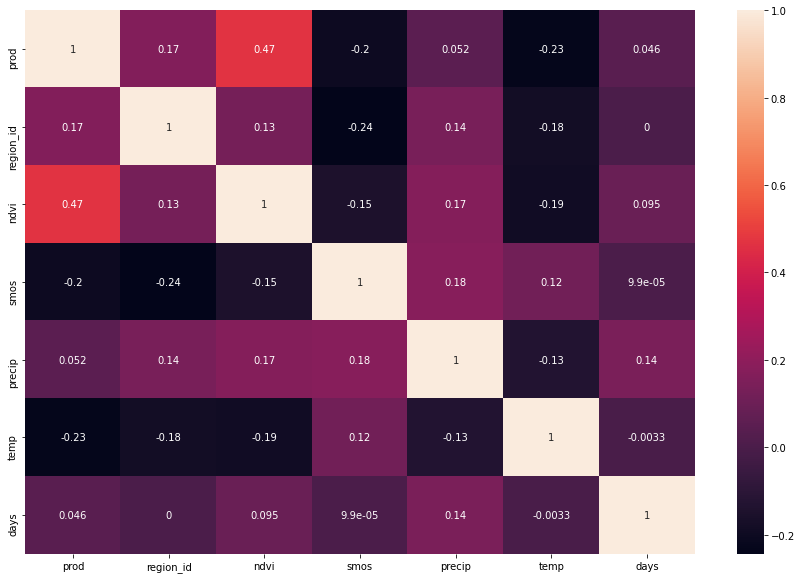

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df_merged.corr(), annot=True)

In [68]:
df_merged.head()

,start_date,end_date,prod,region_id,ndvi,smos,precip,temp,days
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,0.755540,0.318552,4.394452,25.003593,30
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,0.767399,0.291452,1.206137,26.807568,27
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,0.742958,0.251969,3.454652,26.954109,30
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,0.784608,0.248915,10.466472,26.948865,29
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,0.804500,0.280602,9.007986,25.405121,30


In [69]:
df_merged.shape

(720, 9)

In [70]:
# Sort the dataframe for further requirement 

df_merged = df_merged.sort_values(['start_date', 'end_date','region_id'])

In [71]:
df_merged.tail()

,start_date,end_date,prod,region_id,ndvi,smos,precip,temp,days
431,2020-12-01 00:00:00+00:00,2020-12-31 00:00:00+00:00,124475,99,0.800005,0.320579,6.322229,24.405432,30
503,2020-12-01 00:00:00+00:00,2020-12-31 00:00:00+00:00,326135,102,0.831828,0.261280,7.000175,24.440675,30
575,2020-12-01 00:00:00+00:00,2020-12-31 00:00:00+00:00,306488,103,0.824385,0.325129,9.861948,24.605291,30
647,2020-12-01 00:00:00+00:00,2020-12-31 00:00:00+00:00,32747,104,0.782225,0.383109,6.214480,26.492564,30
719,2020-12-01 00:00:00+00:00,2020-12-31 00:00:00+00:00,35728,105,0.778310,0.349358,14.751862,23.856746,30


In [72]:
# drop the dates column to give to model
df_merged = df_merged.drop(columns=['start_date','end_date'],axis=1)

In [73]:
#Spliting X and y data (features and labels respectively)
X = df_merged.drop(['prod'],axis=1)
y = df_merged['prod']

In [74]:
# check X
X.head()

,region_id,ndvi,smos,precip,temp,days
0,93,0.755540,0.318552,4.394452,25.003593,30
72,94,0.782787,0.268754,1.444303,26.559232,30
144,95,0.716406,0.374408,1.520387,23.126085,30
216,97,0.765667,0.309382,1.942695,25.051505,30
288,98,0.757078,0.281108,2.791116,24.094009,30


In [75]:
# check Y data
y.head()


0      171725
72      15066
144     11181
216     37505
288    141442
Name: prod, dtype: int64

In [76]:
# split the dataset in 80% and 20% 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)

In [77]:
# building baseline model
rfr =  RandomForestRegressor()

rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)


In [78]:
y_pred

array([419363.51, 219942.89,  22317.31,  44052.93, 363210.47,  30731.9 ,
       174436.62, 333814.3 , 423234.68,  26432.8 , 246269.35, 180954.17,
       261824.53,  53673.41, 256995.88, 150450.64,  34655.73,  22407.68,
        44206.74,  45368.12,  51218.16,  24837.78, 216245.27,  21662.8 ,
        24918.17,  40327.4 , 355220.85, 253362.38,  42087.59,  30776.8 ,
       443757.41,  44598.08,  17568.75,  45171.85,  19560.96, 296035.7 ,
       413733.7 ,  24038.89,  24332.4 , 165560.65, 221059.86, 142865.92,
        39424.67,  42409.97,  42449.96,  20690.12,  36396.72,  24488.39,
       438530.45, 244908.89,  31464.5 ,  30235.08, 103890.13, 428120.01,
        38565.88,  44657.87, 144092.64, 142819.33, 336264.35,  36990.07,
       162151.77, 354777.22, 258053.4 , 162298.21, 251308.59,  58455.58,
       249814.24, 422933.69,  27055.88,  24428.5 , 327776.98, 168931.58,
        42603.57, 222952.41,  46374.73,  21698.68, 283816.53,  21314.1 ,
       254869.75,  39164.77, 355539.66, 123223.21, 

In [79]:
# checking the R2 
print("R2 Error :" ,r2_score (y_test,y_pred))
print("Root Mean Squre Error :", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Error : 0.9428862994566687
Root Mean Squre Error : 34773.930862631976


In [80]:
def mean_absolute_percentage_error(true, pred):
    abs_error = (np.abs(true - pred)) / true
    sum_abs_error = np.sum(abs_error)
    mape_loss = (sum_abs_error / true.size) * 100
    return mape_loss

mape = mean_absolute_percentage_error(y_test,y_pred)
print(f'Mean Absolute Precentage Error is {mape}' )

Mean Absolute Precentage Error is 17.488272876892005


### Lazy predict

In [117]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24

Found existing installation: scikit-learn 0.23.1
Uninstalling scikit-learn-0.23.1:
  Successfully uninstalled scikit-learn-0.23.1
  Using cached scikit_learn-0.24.0-cp37-cp37m-win_amd64.whl (6.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires scikit-learn==0.23.1, but you have scikit-learn 0.24.0 which is incompatible.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.24.0 which is incompatible.


In [118]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.23.1 which is incompatible.


  Using cached scikit_learn-0.23.1-cp37-cp37m-win_amd64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.0
    Uninstalling scikit-learn-0.24.0:
      Successfully uninstalled scikit-learn-0.24.0


In [119]:
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

ImportError: cannot import name '_raise_dep_warning_if_not_pytest' from 'sklearn.utils.deprecation' (C:\Users\kale_\anaconda3\envs\new_stream\lib\site-packages\sklearn\utils\deprecation.py)

In [ ]:
# fit all models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)



In [ ]:
### fitting data in LazyClassifier
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)

#Predicting for new data (predicted_production_qty.csv)

In [81]:

soil_preci_temp_ndvi_df.head()

,start_date,end_date,ndvi,region_id,smos,precip,temp
0,2014-01-01 00:00:00+00:00,2014-01-31 00:00:00+00:00,0.718269,93,0.287870,2.541758,25.482158
1,2014-02-01 00:00:00+00:00,2014-02-28 00:00:00+00:00,0.767647,93,0.272979,0.326015,26.647786
2,2014-03-01 00:00:00+00:00,2014-03-31 00:00:00+00:00,0.743301,93,0.254618,6.208490,29.379089
3,2014-04-01 00:00:00+00:00,2014-04-30 00:00:00+00:00,0.807792,93,0.277936,10.433339,26.267849
4,2014-05-01 00:00:00+00:00,2014-05-31 00:00:00+00:00,0.813410,93,0.238466,9.160731,26.642768


In [82]:
soil_preci_temp_ndvi_df.shape

(990, 7)

In [83]:
df_pred_qty.head()
# df_pred_qty = df_pred_qty.drop('prod',axis=1)

,start_date,end_date,prod,region_id
0,2021-01-01T00:00:00.000Z,2021-01-31T00:00:00.000Z,NaN,93
1,2021-02-01T00:00:00.000Z,2021-02-28T00:00:00.000Z,NaN,93
2,2021-03-01T00:00:00.000Z,2021-03-31T00:00:00.000Z,NaN,93
3,2021-04-01T00:00:00.000Z,2021-04-30T00:00:00.000Z,NaN,93
4,2021-05-01T00:00:00.000Z,2021-05-31T00:00:00.000Z,NaN,93


In [84]:
# checking the prediction dataset
df_pred_qty.shape

(120, 4)

In [85]:
# drop the column to be predicted for consistency
df_pred_qty = df_pred_qty.drop('prod',axis=1)

In [86]:
df_pred_qty.head()

,start_date,end_date,region_id
0,2021-01-01T00:00:00.000Z,2021-01-31T00:00:00.000Z,93
1,2021-02-01T00:00:00.000Z,2021-02-28T00:00:00.000Z,93
2,2021-03-01T00:00:00.000Z,2021-03-31T00:00:00.000Z,93
3,2021-04-01T00:00:00.000Z,2021-04-30T00:00:00.000Z,93
4,2021-05-01T00:00:00.000Z,2021-05-31T00:00:00.000Z,93


In [87]:
# making objects to datetime
df_pred_qty[ 'start_date' ] = pd.to_datetime(df_pred_qty['start_date'],utc = True)
df_pred_qty[ 'end_date' ] = pd.to_datetime(df_pred_qty['end_date'],utc = True)

#Preparing the DATA : merging the features dataset with the dates for which production quantity is to be predicted for  Jan 2021 to Dec 2021.

In [88]:
# merging the features dataset with the dates for which production quantity is to be predicted. 
df_compute = pd.merge(df_pred_qty,soil_preci_temp_ndvi_df,how='left',on=["start_date",'end_date',"region_id"])

In [89]:
df_compute.shape

(120, 7)

In [90]:
df_compute.isnull().sum()

start_date    0
end_date      0
region_id     0
ndvi          0
smos          0
precip        0
temp          0
dtype: int64

# the below dataset starts from Jan 2021 to Dec 2021

In [91]:
df_compute.head()

,start_date,end_date,region_id,ndvi,smos,precip,temp
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,93,0.812302,0.430121,15.395451,25.093076
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,93,0.776728,0.376494,0.478108,26.897011
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,93,0.777363,0.321724,6.838074,28.251589
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,93,0.812857,0.372365,8.185650,27.924892
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,93,0.819549,0.350557,8.845651,26.930918


In [92]:
df_compute.tail()

,start_date,end_date,region_id,ndvi,smos,precip,temp
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,105,0.811397,0.267808,7.829626,26.764261
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,105,0.820656,0.251307,8.859617,26.673888
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,105,0.804708,0.277053,7.305735,26.967615
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,105,0.798444,0.397742,16.057218,25.322988
119,2021-12-01 00:00:00+00:00,2021-12-31 00:00:00+00:00,105,0.811967,0.431531,14.479881,24.857478


The above head() and tail() shows that the data is aligned to dates we want to predict.

In [93]:
df_compute[['end_date','start_date']] = df_compute[['end_date','start_date']].apply(pd.to_datetime) #if conversion required
df_compute['days'] = (df_compute['end_date'] - df_compute['start_date']).dt.days # feature days


In [94]:
df_compute.head()

,start_date,end_date,region_id,ndvi,smos,precip,temp,days
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,93,0.812302,0.430121,15.395451,25.093076,30
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,93,0.776728,0.376494,0.478108,26.897011,27
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,93,0.777363,0.321724,6.838074,28.251589,30
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,93,0.812857,0.372365,8.185650,27.924892,29
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,93,0.819549,0.350557,8.845651,26.930918,30


In [95]:
df_compute = df_compute.drop(columns=['start_date','end_date'])

 # final data to be given to prediction model 

In [96]:
# final data to be given to model 
df_compute.head()


,region_id,ndvi,smos,precip,temp,days
0,93,0.812302,0.430121,15.395451,25.093076,30
1,93,0.776728,0.376494,0.478108,26.897011,27
2,93,0.777363,0.321724,6.838074,28.251589,30
3,93,0.812857,0.372365,8.185650,27.924892,29
4,93,0.819549,0.350557,8.845651,26.930918,30


In [97]:
# NEW TEST data
X_test_new = df_compute

# Required Predictions from the trained model are as below

In [98]:
# get predictions from trained model
y_pred_new = rfr.predict(X_test_new)

In [99]:
print("***********************Required Predictions from the trained model  for  Jan 2021 to Dec 2021***********************")
y_pred_new

***********************Required Predictions from the trained model  for  Jan 2021 to Dec 2021***********************


array([228959.15, 189647.52, 258154.12, 298261.71, 246368.56, 234848.94,
       225103.72, 232260.61, 286346.47, 297723.24, 284355.42, 229407.1 ,
        21665.86,  20329.  ,  26072.96,  25672.21,  21527.24,  20348.75,
        33193.87,  25150.66,  22892.45,  20532.78,  17228.49,  18576.74,
        22375.22,  16719.19,  31498.47,  31249.07,  28811.47,  26654.4 ,
        32830.88,  26983.87,  30853.69,  26350.05,  23271.58,  19736.21,
        51631.73,  40652.67,  49945.33,  50966.79, 167922.05, 118048.12,
        83757.71,  69395.18,  54396.7 ,  54435.64,  65940.29,  54772.34,
       211546.27, 171846.44, 225687.97, 271929.37, 277076.79, 258509.83,
       273592.78, 260203.45, 269164.82, 252782.42, 210855.23, 201597.26,
       140583.74, 141043.2 , 159001.42, 180254.97, 172923.59, 200375.1 ,
       205828.62, 145606.32, 153442.2 , 161228.47, 144871.56, 138804.6 ,
       382243.24, 351872.88, 447452.68, 434867.26, 431840.1 , 425995.69,
       406404.92, 422767.62, 423874.58, 446510.37, 